In [11]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

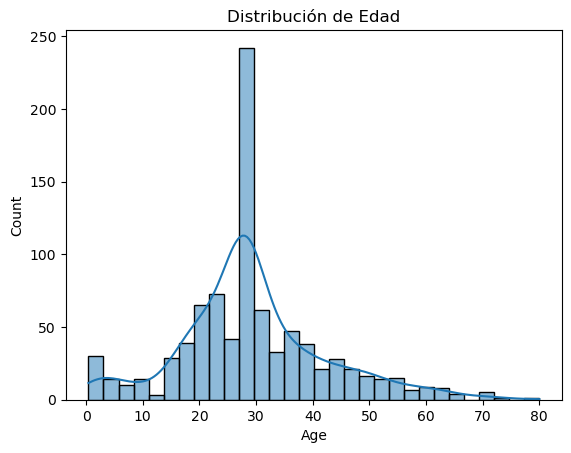

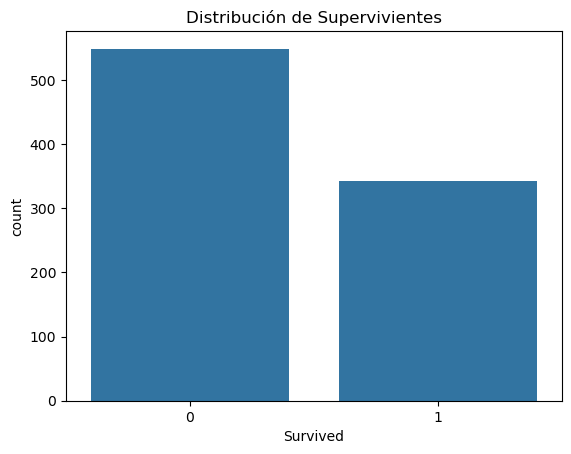

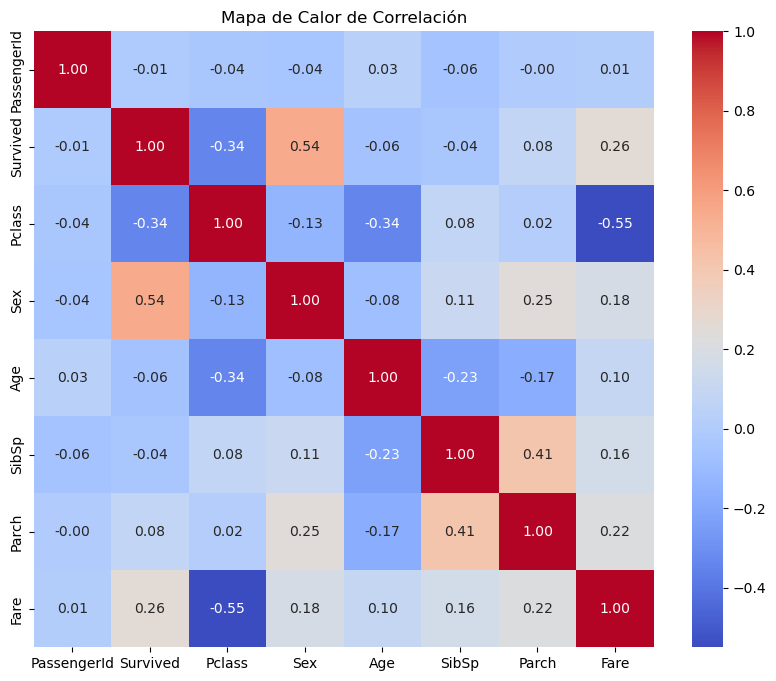

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



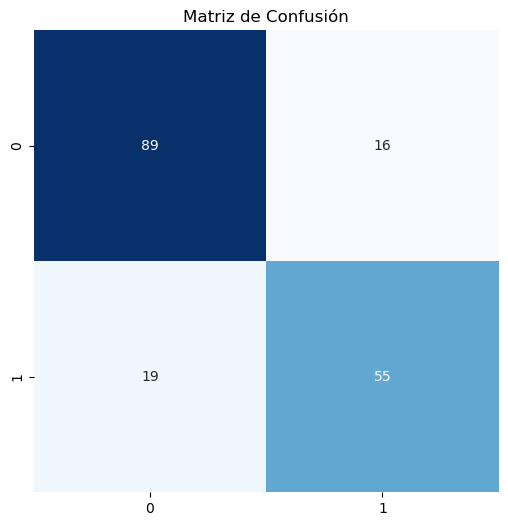

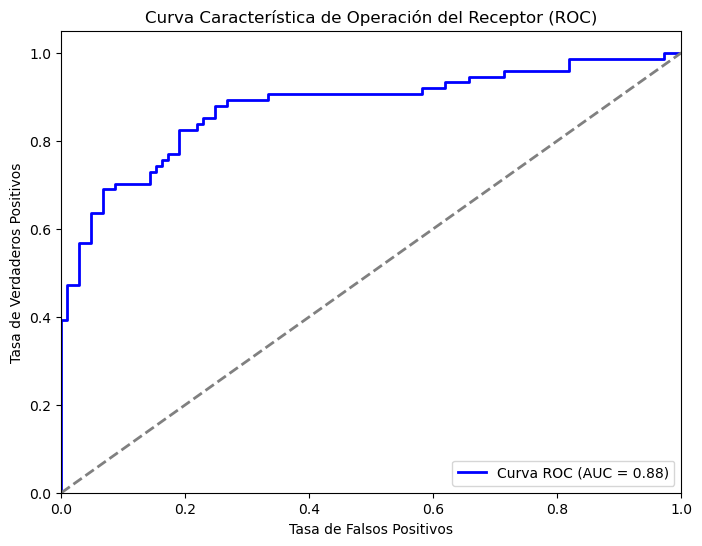

In [19]:
# Cargar el dataset
df = pd.read_csv('C:/Users/d.medina.mosquera/Downloads/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Ver las columnas y tipos de datos
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Análisis de valores nulos
print(df.isnull().sum())

# Rellenar valores nulos en la columna 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Rellenar valores nulos en la columna 'Embarked' con el modo
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Eliminar filas con valores nulos en 'Survived'
df.dropna(subset=['Survived'], inplace=True)

# Convertir la variable 'Sex' en 0 y 1 (masculino: 0, femenino: 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convertir la variable 'Embarked' en variables dummies (One Hot Encoding)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Eliminar columnas no necesarias para el modelo, como 'Name', 'Ticket', 'Cabin'
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Visualizar la distribución de la variable 'Age'
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribución de Edad')
plt.show()

# Visualizar la distribución de sobrevivientes
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivientes')
plt.show()

# Seleccionar solo las columnas numéricas para evitar el error
numeric_df = df.select_dtypes(include=[np.number])

# Correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Dividir el dataset en características (X) y objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar todas las columnas numéricas
numeric_columns = ['Age', 'Fare']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Crear el modelo de regresión logística con más iteraciones
model = LogisticRegression(max_iter=500)  # Aumentamos el número de iteraciones
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo con el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()
